# Assignment 2: System identification
## Y2 Computing (2020&ndash;21), weeks 5&ndash;7

In this assignment you are presented with a number of "black box" components, each of which contains code that models a certain electronic system. By investigating the response of each box to generated input (voltage) signals, you will be able to determine the type of system each box contain and estimate its parameters (e.g. resistance and inductance).
Before you continue with this assignment, please read `Y2_Computing_System_Identification.pdf` and work though the example notebook `black_box_example.ipynb`. Both are provided as part of this assignment.

As before, you must **enter your student ID** in the variable studentID and execute the cell below before starting the assignment. This will import the necessary Boxes objects. As in assignment 1, the final cell contains a function call (`Boxes.check()`) which you should run to check that the naming of variables and functions in each task is correct.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Do not alter any of the code within this cell other than the value of studentID
from module_engine.assignment import Boxes
studentID = 0

# Creating box objects to be investigated in this assignment
t1_box1, t1_box2, t1_box3, t2_box, t3_box = Boxes.get_boxes(studentID)

*** Using a temporary ID. Switch to your own ID as soon as possible. ***

*** Using a temporary ID. Switch to your own ID as soon as possible. ***

*** Using a temporary ID. Switch to your own ID as soon as possible. ***

*** Using a temporary ID. Switch to your own ID as soon as possible. ***

*** Using a temporary ID. Switch to your own ID as soon as possible. ***



## Task 1
#### Marks available:  4

Each of the following circuits is contained in *one* of the boxes `t1_box1`, `t1_box2` and `t1_box3`:
- RL high pass filter;
- RC low pass filter;
- RLC band pass filter.

By analysing the action of each box on custom signals and employing the `.fft` and `.fftfreq` functions from `numpy.fft`, identify the type of circuit contained in each box. A blank cell has been provided for your working, but you are free to insert as many additional cells as you require. 

After completing your investigation set the variables `RL_circuit`, `RC_circuit` and `RLC_circuit` in the next cell to a value of 1, 2 or 3 to indicate which box matches the relevant circuit. For example, write `RC_circuit = 1` if you believe `t1_box1` to be the RC low pass filter or
`RC_circuit = 2` if you believe that system is in `t1_box2`.

**Reminder**:
Use the `.process()` method to interact with the `Boxes` objects, as shown in `black_box_example.ipynb`

**Hint**:
In order to obtain an informative result, your time domain input signal should contain frequency components ranging from 10 to 4000 Hz.

In [2]:
def swept_sine(f1, f2, t):
    """ 
    create a sine wave with a frequency sweeping between f1 and f2
    f1: start frequency [Hz]
    f2: stop frequency [Hz]
    t: np.array of linearly spaced points in time [s]
    """
    f = np.linspace(f1,f2,t.size)
    output = np.sin(2*np.pi*f*t)
    return output

/Users/adrienauriol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Sampling a signal correctly is a bit tricky, you need
# to make sure you know the total time, timestep and number
# of points accuractely. If in doubt, compute these from the
# time array you created and print the result.

def get_time_array(N=1000, duration=10, endpoint=False):
    # N: Number of sample points
    # duration: end point of the open interval
    
    t = np.linspace(0, duration, num=N, endpoint=endpoint) 
    total_time = t[-1]-t[0] # different from duration!!
    timestep = total_time/(N-1) 
    print("Data points = {}".format(N))
    print("Total time = {} s".format(total_time))
    print("Timestep = {} s".format(timestep))
    print("Sampling Frequency = {} Hz".format((1/timestep)))
    
    return t

# generate time array
t = get_time_array(N=500000, duration = 0.1)

# generate array containing input signal (voltage) 
s_in = swept_sine(10,400,t)

Data points = 500000
Total time = 0.09999980000000001 s
Timestep = 2.0000000000000002e-07 s
Sampling Frequency = 5000000.0 Hz


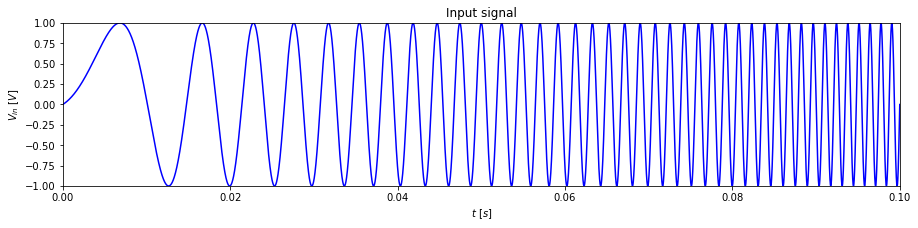

In [4]:
fig = plt.figure(figsize=(15,3))

# Plot input voltage as a function of time (for the first 5 seconds)
plt.plot(t, s_in, 'b-')
plt.title('Input signal') 
plt.xlabel(r'$t ~ [s]$') 
plt.ylabel(r'$V_{in} ~ [V]$')
plt.axis([0, 0.1, np.amin(s_in), np.amax(s_in)])
plt.show()

/Users/adrienauriol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


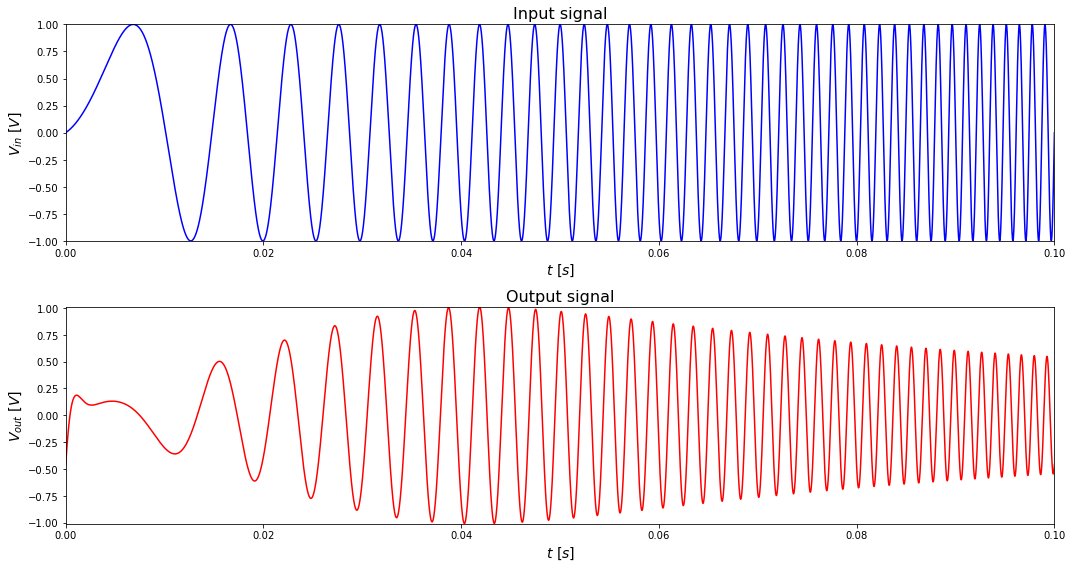

In [5]:
# Pass input signal through the example_box and create an output signal:
s_out = t1_box1.process(t, s_in)

# And plot the result, comparing input to output
fig = plt.figure(figsize=(15,8))
# Plot input voltage as a function of time
plt.subplot(211)
plt.plot(t, s_in, 'b-')
plt.title('Input signal', fontsize=16) 
plt.xlabel(r'$t~[s]$', fontsize=14) 
plt.ylabel(r'$V_{in}~[V]$', fontsize=14)
plt.axis([0, 0.1, np.amin(s_in), np.amax(s_in)])

# Plot output voltage as a function of time
plt.subplot(212)
plt.plot(t, s_out, 'r-')
plt.title('Output signal', fontsize=16)
plt.xlabel(r'$t~[s]$', fontsize=14) 
plt.ylabel(r'$V_{out}~[V]$', fontsize=14) 
plt.axis([0, 0.1, np.amin(s_out), np.amax(s_out)])

# Automatically adjust subplots to fit figure area
plt.tight_layout()
# Display plots
plt.show()

/Users/adrienauriol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


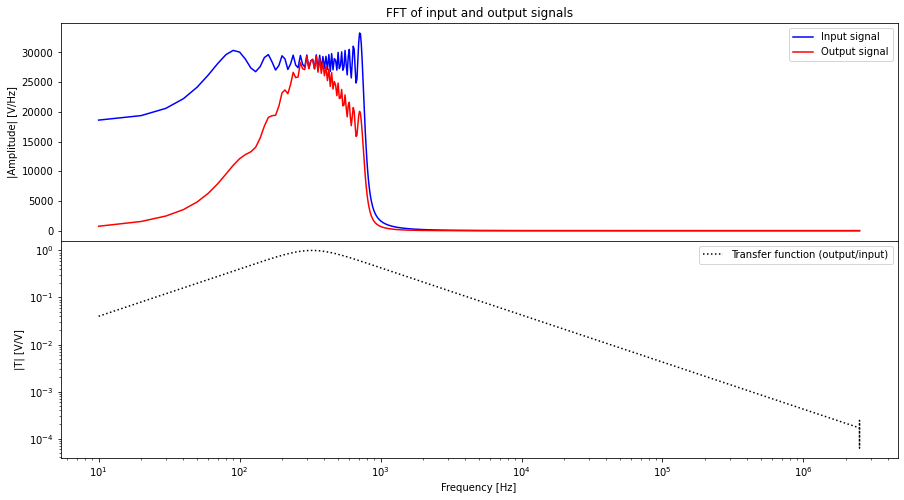

In [6]:
# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

# Next we generate sample points in the frequency domain,
# for this we need to know the duration and time step
# of the time array.
def get_frequency_array(t):
    N = len(t)
    timestep = np.diff(t)[0]
    f = np.fft.fftfreq(N, d=timestep)
    return f

f = get_frequency_array(t)

# We only want to plot the positive frequencies from the FFT.
# This means we can ignore half of each array.
# Check the numpy.fftfreq documentation to see that 
# frequencies are arranged as follows:
# f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)  if n is even
# So we are interested in the elements f[1:n/2].
def get_positive_frequencies(A):
    N=len(A)
    if len(A)//2==0:
        N2=int(N/2)
    else:
        N2=int((N+1)/2)
    return A[1:N2]

f = get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output 
ax[0].plot(f, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(f, np.abs(S_out/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('|T| [V/V]')
ax[1].legend()

ax[0].set_title('FFT of input and output signals')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [7]:
# Now assign each of these variables a (unique) value of 1, 2 or 3.
# For example if you know that t1_box2 contains the RC_circuit, set RC_circuit=2.
# If instead you found the RC_circuit in t1_box1, set RC_circuit=1.
RL_circuit = 2 #high pass 
RC_circuit = 3 #low pass
RLC_circuit = 1 #band pass



/Users/adrienauriol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task 2
#### Marks available:  3
You are to work with the black box `t2_box` (defined in the first cell of the notebook) in this task. It is known that this box contains an **RL high pass** filter circuit, but with parameter values **different** from those of the RL high pass circuit in task 1. 

Employing a similar method to that used in task 1, examine the characteristic transfer function of this circuit to determine an approximate value for the associated corner frequency, i.e. such frequency $f_0$ that $|T(f_0)| =1/\sqrt{2}$. 

The examples in `Y2_Computing_System_Identification.pdf` refer to $T(\omega)$ while we sometimes use $T(f)$. These are the same function just plotted over a different axis ($\omega = 2\pi f$). It is easy to make mistakes when applying this scaling. You should always check if you are using the right frequency scaling for a given task.

After you complete you investigation store the value for $f_0$ in the variable `corner_frequency`. During marking, your value will be compared to the true value with a tolerance of 10 Hz. Ensure that your sample density in the frequency domain is sufficient to achieve this level of accuracy.

Furthermore, assuming that the resistance of the circuit is R=200 &Omega;, calculate the inductance of the inductor in Henrys and store this in the variable `inductance`. Do **not** round this value.

**Hints**:
  * Your time domain input signal should contain frequency components ranging from 10 to 3000 Hz in order to obtain an informative result. 
  * For finding a specific value in a numpy array you may use the `numpy.argmin` function. 
  Play with and understand the following code:
  ```
  a=np.array([10, 11, 12, 15, 20, 30])
  index=np.argmin(np.abs(a-15))
  print(index)
  print(a[index])
  ```
  * To check visually whether you found the corner frequency correctly you can plot additional lines into the graph with the transfer fucntion, for example using `plt.axvline(x=f0)` and `plt.axhline(y=1/np.sqrt(2),linestyle='--')`.

Data points = 500000
Total time = 99.99980000000001 s
Timestep = 0.0002 s
Sampling Frequency = 5000.0 Hz


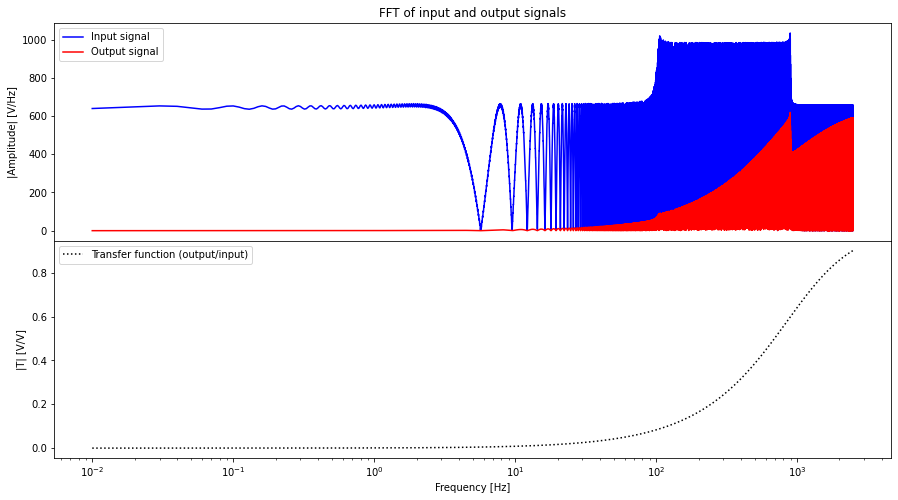

119745
1197.46


In [8]:
# generate time array
t = get_time_array(N=500000, duration = 100.0)

# generate array containing input signal (voltage) 
s_in = swept_sine(100,3000,t)

# This cell is for work on task 2 - explore frequencies up to 3000 Hz
s_out = t2_box.process(t, s_in)
# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

f = get_frequency_array(t)

f = get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

# Creating some custom subplots
fg, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

# Plot the absolute values of transformed_output 
ax[0].plot(f, np.abs(S_in), 'b-', label='Input signal') 
ax[0].plot(f, np.abs(S_out), 'r-', label='Output signal')
ax[0].legend()

ax[1].plot(f, np.abs(S_out/S_in), 'k:', label='Transfer function (output/input)')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('|T| [V/V]')
ax[1].legend()

ax[0].set_title('FFT of input and output signals')
ax[0].set_ylabel('|Amplitude| [V/Hz]')

# Fine-tune figure; make subplots close to each other and hide x ticks for top plot.
fg.subplots_adjust(hspace=0)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.xscale("log")
#plt.yscale("dB")
plt.show()

a=np.abs(S_out/S_in)
index=np.argmin(np.abs(a-(1/np.sqrt(2))))
print(index)
print(f[index])


In [9]:
# Put your solutions to task 2 here
corner_frequency = 1197.46 # Corner frequency in Hz
#w0 = R/L
#2pi fo = R/L
#L = R / 2pifo

inductance = 200 / ( 2* np.pi * corner_frequency)       # Inductance in Henrys

/Users/adrienauriol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Resonance in RLC series circuits
The sharp peak in transmission for an RLC series circuit associated with a minimum of impedance is referred to as series resonance, with the **resonance frequency** $f_0$ being that at which the transfer function attains its maximum value of $T(\omega_0)=1$. Considering that

$$|T(\omega) | = \frac{R}{\sqrt{R^2+(\omega L - 1/\omega C)^2}},$$

this occurs when $\omega L = 1/\omega C$ (i.e. the inductive reactance equals the capacitive reactance). Therefore the resonance frequency is

$$\omega_0^2 = \frac{1}{LC} \implies f_0 = \frac{1}{2\pi \sqrt{LC}}.$$

For all intents and purposes, a signal is passed by an RLC circuit if it has a frequency contained between the **two** (lower and upper) cut-off frequencies, $f_l$ and $f_h$, at which the transfer function has a magnitude of $1/\sqrt{2}$. The **bandwidth** of the circuit (also known as the resonance width) is then defined as the difference between these two frequencies, i.e $f_h - f_l$.

## Task 3
#### Marks available:  8
You are to work with the blackbox `t3_box` (defined in the first cell of the notebook) in this task. This contains an **RLC band pass** filter circuit, with values of resistance, inductance and capacitance different from those of the RLC circuit in task 1.

Firstly, determine the transfer function for this circuit and **plot its magnitude**, $|T(f)|$, against frequency, $f$ (in Hz), on the interval <nobr>$f \in [10,2000]$ Hz</nobr> on the figure object provided (`student_figure`). You should ensure that your input signal contains frequency components ranging from 10 to <nobr>2000 Hz</nobr> (we recommend that you use at least 4000 samples and a signal length of 1s).

You should use a linear scale on the y-axis (do **not** use dB), and a logarithmic scale on the frequency axis. This is achieved through the use of the `plt.semilogx()` function. Your plot should also have a title and axis titles. 

Do not add other data or lines to the plot in `student_figure`. If you want to make additional plots, you should create those as separate figures that use different names.

Using your plotted data or otherwise, estimate the **resonant frequency** and the **bandwidth** of the circuit in Hz and assign these to the variables `resonant_frequency` and `bandwidth`. As in task 2, these values should be accurate to 10 Hz.

Data points = 4000
Total time = 0.99975 s
Timestep = 0.00025 s
Sampling Frequency = 4000.0 Hz


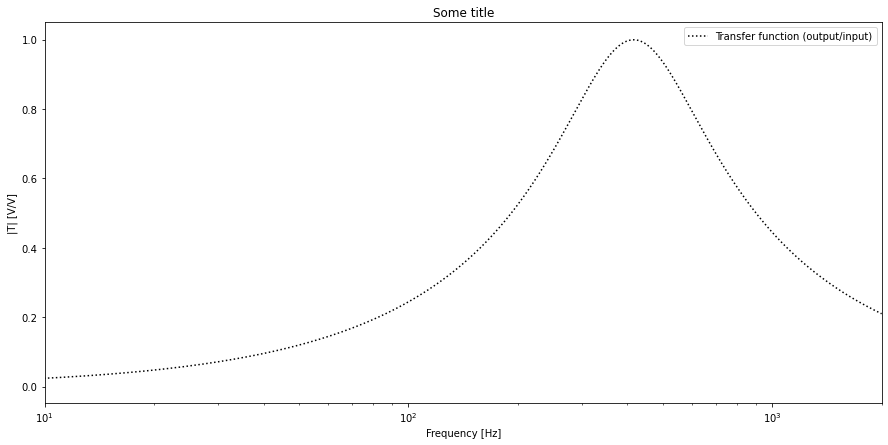

In [10]:
# generate time array
t = get_time_array(N=4000, duration = 1)

# generate array containing input signal (voltage) 
s_in = swept_sine(10,2000,t)

# This cell is for work on task 2 - explore frequencies up to 3000 Hz
s_out = t3_box.process(t, s_in)
# Perform the Fourier Tranform on both signals
S_in = np.fft.fft(s_in)
S_out = np.fft.fft(s_out)

f = get_frequency_array(t)

f = get_positive_frequencies(f)
S_in = get_positive_frequencies(S_in)
S_out = get_positive_frequencies(S_out)

# Please do not create any other figure object 
student_figure = plt.figure(figsize=(15,7))

plt.plot(f, np.abs(S_out/S_in), 'k:', label='Transfer function (output/input)')
plt.xlim(10, 2000)
plt.semilogx()
plt.title("Some title")
plt.xlabel('Frequency [Hz]')
plt.ylabel('|T| [V/V]')
plt.legend();


# You may perform additional working, but ensure that the plot
# you wish to be marked is on student_figure defined above

In [11]:
a=np.abs(S_out/S_in)
index=np.argmin(np.abs(a-(1/np.sqrt(2))))
print(index)
print(f[index])

resonant_frequency = 416 # Resonant frequency in Hz
bandwidth = 410          # Bandwidth in Hz



668
669.0


/Users/adrienauriol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task 4
#### Marks available:  5
For the final task you are to create your own black box function called `my_box_process(t, s_in, R, L)` that mimics the behaviour of an **RL low pass filter** circuit of resistance `R` (Ohms) and inductance `L` (Henrys).

`t` and `s_in` will be two NumPy arrays representing an input voltage signal with physical amplitude `s_in[i]` at time `t[i]`, and the function should return a NumPy array containing the **real** output signal in the time domain (i.e. the final output data must be real numbers not complex numbers).

You will need the transfer function for the RL low-pass filter circuit:
$$T(f) = \frac{1}{1+i(f/f_0)},$$ where $f_0 = R/(2\pi L)$.

#### Hints:
- Use `.fft` to perform an FFT on the input signal before applying the transfer function in the frequency domain. You will then need to use the `.ifft` function to represent this modulated signal in the time domain (see [ifft in the numpy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.ifft.html)).
- You may wish to define the transfer function separately and call this within my_box_process.
- In Python, `1j` is used to represent the imaginary unit.
- Make sure your function returns a physical time domain signal (i.e. real values that can change sign). The `ifft` function will return an array of complex numbers with the real part of these numbers containing the signal we are interested in.
- Because the input and output of your black box must be NumPy arrays, you do not need to use any `for` loops in your code.

In [12]:
# Function definition for task 4
def transfer(f,f0):
    
    #return (1 / ( 1 + (f/f0)**2 ) ) - (f / (f0*( 1 + (f/f0)**2 )) )*1j
    return 1 / (1 + 1j*(f/f0))




In [13]:
# Feel free to insert additional cells for working
def my_box_process(t, s_in, R, L):
    fft_in=np.fft.fft(s_in)
    
    f=get_frequency_array(t)
    
    f0=R/(2*np.pi*L)
    fft_out = transfer(f,f0)*fft_in
    
    s_out=np.fft.ifft(fft_out)
    
    return s_out.real


Please execute the following statement before submitting your work. It will check that you have used correct naming for the variables and functions specified in the above tasks. It will not tell you whether you have correctly defined and implemented these! You may execute this statement as many times as required.

In [14]:
Boxes.check()

my_box_process function is correctly named.
RL_circuit variable is correctly named.
RC_circuit variable is correctly named.
RLC_circuit variable is correctly named.
corner_frequency variable is correctly named.
inductance variable is correctly named.
resonant_frequency variable is correctly named.
bandwidth variable is correctly named.
RL_circuit, RC_circuit and RLC_circuit are assigned in a valid way.


Before you submit, select 'Kernel &rarr; Restart & Run All' in the Jupyter menu. This will reset the notebook and run all your code sequentially, similar to what marking script will do.

# For demonstrators
This example comes with the marking script included. Thus you can check your marks by exectuting the following cell. The students will not get the `marker` code and will *not* be able to do this.

In [15]:
import module_engine.marker as mark
mk=mark.Solution2(studentID)
mk.mark();


Task 1:
 We checked that 'RLC_circuit', 'RL_circuit' and 'RC_circuit' were
 variables in your notebook: RLC_circuit was found, RL_circuit was
 found, RC_circuit was found. You correctly identified box 1 with
 RLC_circuit, you correctly identified box 2 with RL_circuit, you
 correctly identified box 3 with RC_circuit.
Score: 4/4
Task 2:
 'corner_frequency' was found and its value was within 10Hz of the
 true value (1197.5). 'inductance' was found and its value was correct
 (error carried forward considered).
Score: 3/3
Task 3:
 A figure called 'student_figure' was found.  The figure has an x axis
 label, y axis label and a title .  The x axis is logarithmic spaced,
 as required (log10).  The range of frequencies you explored were good
 (at least from 200.0 to 1800.0).  Your plotted values matched the
 output of the true transfer function to within an acceptable
 tolerance. 'resonant_frequency' was found and its value was within
 10Hz of the true value (416.0). 'bandwidth' was found and 

Marking student ID 0
*** Using a temporary ID. Switch to your own ID as soon as possible. ***

0.0
